In [1]:
# For inline plotting
%matplotlib inline

# For auto reloading
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from pathlib import Path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from mab import GleapAgent, GleapEpsilonGreedyAgent, UcbAgent, UniformlyRandomAgent
import simulation_config


# Load all the simulation objects
# date = "20210812_212204"
date = "20210818_155725"
simulation_list = []
pathlist = Path("./simulations_data/vb/{:s}".format(date)).glob('*.pkl')
for path in pathlist:
    with open(path, "rb") as f:
        simulation_list.append(pickle.load(f))


# Sort the simulation list in the ascending order of v
def value_func(simulation_index):
    simulation = simulation_list[simulation_index]
    agent = simulation.agent
    
    value = 0.0
    
    value += agent.v
    
    return value


# A dictionary. Key: b. Value: a list of simulation index, sorted in the ascending order of v.
b_simulation_index_list_dict = {}


for simulation_index, simulation in enumerate(simulation_list):
    b = simulation.agent.b
    if b in b_simulation_index_list_dict:
        b_simulation_index_list_dict[b].append(simulation_index)
    else:
        b_simulation_index_list_dict[b] = [ simulation_index ]
b_list = sorted([ b for b in b_simulation_index_list_dict ])
for b in b_simulation_index_list_dict:
    sorted_list = sorted(b_simulation_index_list_dict[b], key=lambda i: value_func(i))
    b_simulation_index_list_dict[b] = sorted_list
    for simulation_index in sorted_list:
        simulation = simulation_list[simulation_index]


for b in b_list:
    print("B = {:.1f}".format(b))
    simulation_index_list = b_simulation_index_list_dict[b]
    for simulation_index in simulation_index_list:
        simulation = simulation_list[simulation_index]
        print(simulation.agent.name)
    print()


B = 10.0
G-LEAP, $B = 10.0$, $V = 1.0$
G-LEAP, $B = 10.0$, $V = 10.0$
G-LEAP, $B = 10.0$, $V = 100.0$
G-LEAP, $B = 10.0$, $V = 1000.0$
G-LEAP, $B = 10.0$, $V = 10000.0$

B = 20.0
G-LEAP, $B = 20.0$, $V = 1.0$
G-LEAP, $B = 20.0$, $V = 10.0$
G-LEAP, $B = 20.0$, $V = 100.0$
G-LEAP, $B = 20.0$, $V = 1000.0$
G-LEAP, $B = 20.0$, $V = 10000.0$

B = 30.0
G-LEAP, $B = 30.0$, $V = 1.0$
G-LEAP, $B = 30.0$, $V = 10.0$
G-LEAP, $B = 30.0$, $V = 100.0$
G-LEAP, $B = 30.0$, $V = 1000.0$
G-LEAP, $B = 30.0$, $V = 10000.0$



In [3]:
import math
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from mab import GleapAgent, GleapEpsilonGreedyAgent


def calculate_metrics(simulation_index):
    simulation = simulation_list[simulation_index]
    
    # For regret
    time_averaged_regret_array = np.mean(simulation.time_averaged_regret_2darray, axis=0)
    cumulative_regret_array = np.mean(simulation.cumulative_regret_2darray, axis=0)
    
    # For time-averaged total prediction accuracy
    time_averaged_total_prediction_accuracy_array = np.mean(simulation.time_averaged_total_prediction_accuracy_2darray, axis=0)
    
    # For queue length
    if isinstance(simulation.agent, (GleapAgent, GleapEpsilonGreedyAgent)):
        q_array = np.mean(simulation.q_2darray, axis=0)
    else:
        q_array = None
    
    # For time-averaged total prediction latency
    time_averaged_total_prediction_latency_array = np.mean(simulation.time_averaged_total_prediction_latency_2darray, axis=0)
    
    # For time-averaged energy consumption
    time_averaged_energy_consumption_array = np.mean(simulation.time_averaged_energy_consumption_2darray, axis=0)
    
    return {\
            "time_averaged_regret_array": time_averaged_regret_array,\
            "cumulative_regret_array": cumulative_regret_array,\
            "time_averaged_total_prediction_accuracy_array": time_averaged_total_prediction_accuracy_array,\
            "q_array": q_array,\
            "time_averaged_total_prediction_latency_array": time_averaged_total_prediction_latency_array,\
            "time_averaged_energy_consumption_array": time_averaged_energy_consumption_array\
           }


In [4]:
def plot_vb_simulations():
    # mkdir
    Path("./simulations_data/vb/{:s}/figures".format(date)).mkdir(parents=True, exist_ok=True)
    
    color_list = [ '#009E73', '#0072B2', '#D55E00', '#E69F00', '#CC79A7' ]
    marker_list = [ 'D', 's', 'o', 'v', '*' ]
    MARKER_SIZE = 25.0
    LINE_WIDTH = 6.0
    FONT_SIZE = 36.0
    FONT_SIZE_TICK = 32.0
    FIG_SIZE = (16,9)
    DPI = 160
    GRID = False
    FONT_WEIGHT = "normal"
    
    converged_time_averaged_regret_array_list = []
    converged_time_averaged_total_prediction_accuracy_array_list = []
    converged_time_averaged_total_prediction_latency_array_list = []
    for b in b_list:
        simulation_index_list = b_simulation_index_list_dict[b]
        print("b =", b, ", simulation_index_list =", simulation_index_list)
        
        length = len(simulation_index_list)
        converged_time_averaged_regret_array = np.zeros(length, dtype=float)
        converged_time_averaged_total_prediction_accuracy_array = np.zeros(length, dtype=float)
        converged_time_averaged_total_prediction_latency_array = np.zeros(length, dtype=float)
        
        for index, simulation_index in enumerate(simulation_index_list):
            metrics = calculate_metrics(simulation_index)
            
            converged_time_averaged_regret_array[index] = metrics["time_averaged_regret_array"][-1]
            converged_time_averaged_total_prediction_accuracy_array[index] = metrics["time_averaged_total_prediction_accuracy_array"][-1]
            converged_time_averaged_total_prediction_latency_array[index] = metrics["time_averaged_total_prediction_latency_array"][-1]
        
        converged_time_averaged_regret_array_list.append(converged_time_averaged_regret_array)
        converged_time_averaged_total_prediction_accuracy_array_list.append(converged_time_averaged_total_prediction_accuracy_array)
        converged_time_averaged_total_prediction_latency_array_list.append(converged_time_averaged_total_prediction_latency_array)

    
    # For the converged time-averaged regret
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_fontweight(FONT_WEIGHT)
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_fontweight(FONT_WEIGHT)
#     ax.set_yticks([ -0.25, -0.05, 0.15 ])
    ax.set_xticks([ 0, 1, 2, 3, 4 ])
    for index, converged_time_averaged_regret_array in enumerate(converged_time_averaged_regret_array_list):
        b = b_list[index]
        simulation_index_list = b_simulation_index_list_dict[b]
        v_list = [ simulation_list[simulation_index].agent.v for simulation_index in simulation_index_list ]
        if b < 1.0:
            label = "$b = {:.1f}$".format(b)
        else:
            label = "$b = {:d}$".format(int(b))
        
        ax.plot(np.log10(v_list), converged_time_averaged_regret_array, marker_list[index], linestyle="-", color=color_list[index], label=label, markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
    legend = ax.legend(shadow=True, prop={ 'size': 32, 'weight': 'normal'})
    #     legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), shadow=True, ncol=2, fontsize=20.0)
    plt.grid(GRID)
    ax.set_xlabel(r'$\log_{10} V$', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Avg. Regret', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    # Save the figure
    fig.savefig('./simulations_data/vb/{:s}/figures/fig_vb_simulations_converged_time_averaged_regret.pdf'.format(date), format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
    fig.savefig('./simulations_data/vb/{:s}/figures/fig_vb_simulations_converged_time_averaged_regret.png'.format(date), format='png', bbox_extra_artists=(legend,), bbox_inches='tight')
    
    # For the converged time-averaged total prediction accuracy
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    ax.set_xticks([ 0, 1, 2, 3, 4 ])
    for index, converged_time_averaged_regret_array in enumerate(converged_time_averaged_regret_array_list):
        b = b_list[index]
        simulation_index_list = b_simulation_index_list_dict[b]
        v_list = [ simulation_list[simulation_index].agent.v for simulation_index in simulation_index_list ]
        if b < 1.0:
            label = "$b = {:.1f}$".format(b)
        else:
            label = "$b = {:d}$".format(int(b))
        
        ax.plot(np.log10(v_list), converged_time_averaged_total_prediction_accuracy_array, marker_list[index], linestyle="-", color=color_list[index], label=label, markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
#     legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), shadow=True, ncol=2, fontsize=20.0)
    legend = ax.legend(shadow=True, prop={ 'size': 32, 'weight': 'bold'})
    plt.grid(GRID)
    ax.set_xlabel(r'$\log_{10} V$', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Avg. Prediction Accuracy', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    # Save the figure
    fig.savefig('./simulations_data/vb/{:s}/figures/fig_vb_simulations_converged_time_averaged_total_prediction_accuracy.pdf'.format(date), bbox_extra_artists=(legend,), format='pdf', bbox_inches='tight')
    fig.savefig('./simulations_data/vb/{:s}/figures/fig_vb_simulations_converged_time_averaged_total_prediction_accuracy.png'.format(date), bbox_extra_artists=(legend,), format='png', bbox_inches='tight')
    
    # For the converged time-averaged total prediction latency
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
    ax.set_xticks([ 0, 1, 2, 3, 4 ])
    for index, converged_time_averaged_regret_array in enumerate(converged_time_averaged_regret_array_list):
        b = b_list[index]
        simulation_index_list = b_simulation_index_list_dict[b]
        v_list = [ simulation_list[simulation_index].agent.v for simulation_index in simulation_index_list ]
        if b < 1.0:
            label = "$b = {:.1f}$".format(b)
        else:
            label = "$b = {:d}$".format(int(b))
        
        ax.plot(np.log10(v_list), converged_time_averaged_total_prediction_latency_array, marker_list[index], linestyle="-", color=color_list[index], label=label, markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
#     legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), shadow=True, ncol=2, fontsize=20.0)
    legend = ax.legend(shadow=True, prop={ 'size': 32, 'weight': 'bold'})
    plt.grid(GRID)
    ax.set_xlabel(r'$\log_{10} V$', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    ax.set_ylabel(r'Avg. Total Latency', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
    # Save the figure
    fig.savefig('./simulations_data/vb/{:s}/figures/fig_vb_simulations_converged_time_averaged_total_prediction_latency.pdf'.format(date), format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
    fig.savefig('./simulations_data/vb/{:s}/figures/fig_vb_simulations_converged_time_averaged_total_prediction_latency.png'.format(date), format='png', bbox_extra_artists=(legend,), bbox_inches='tight')


b = 10 , simulation_index_list = [12, 13, 4, 14, 1]
b = 20 , simulation_index_list = [2, 11, 9, 6, 7]
b = 30 , simulation_index_list = [8, 5, 3, 0, 10]


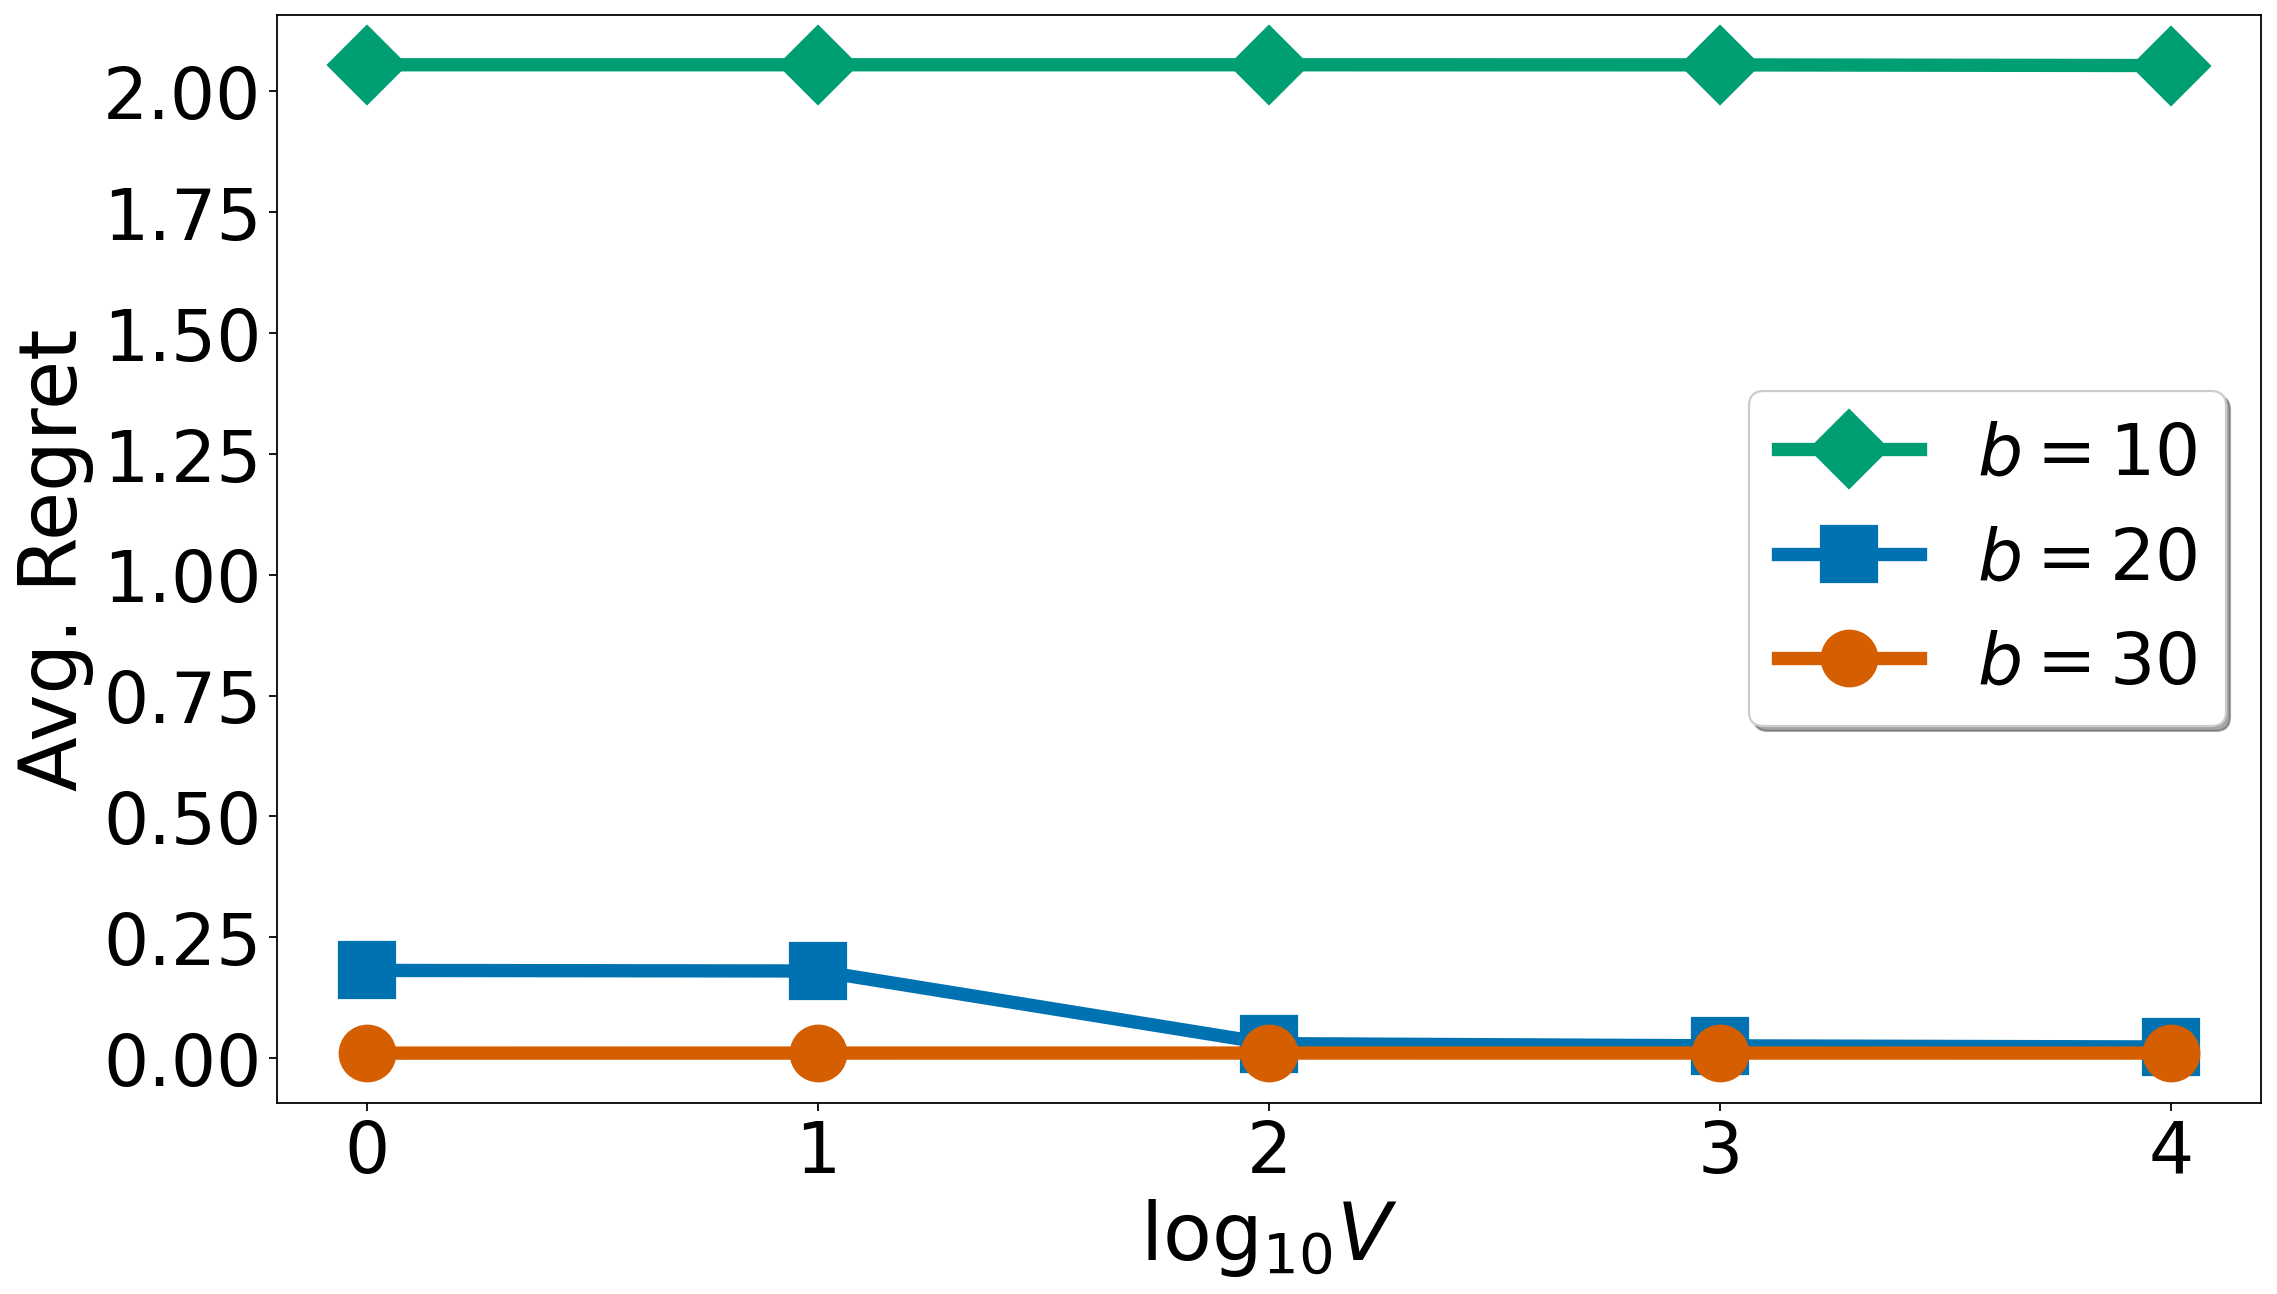

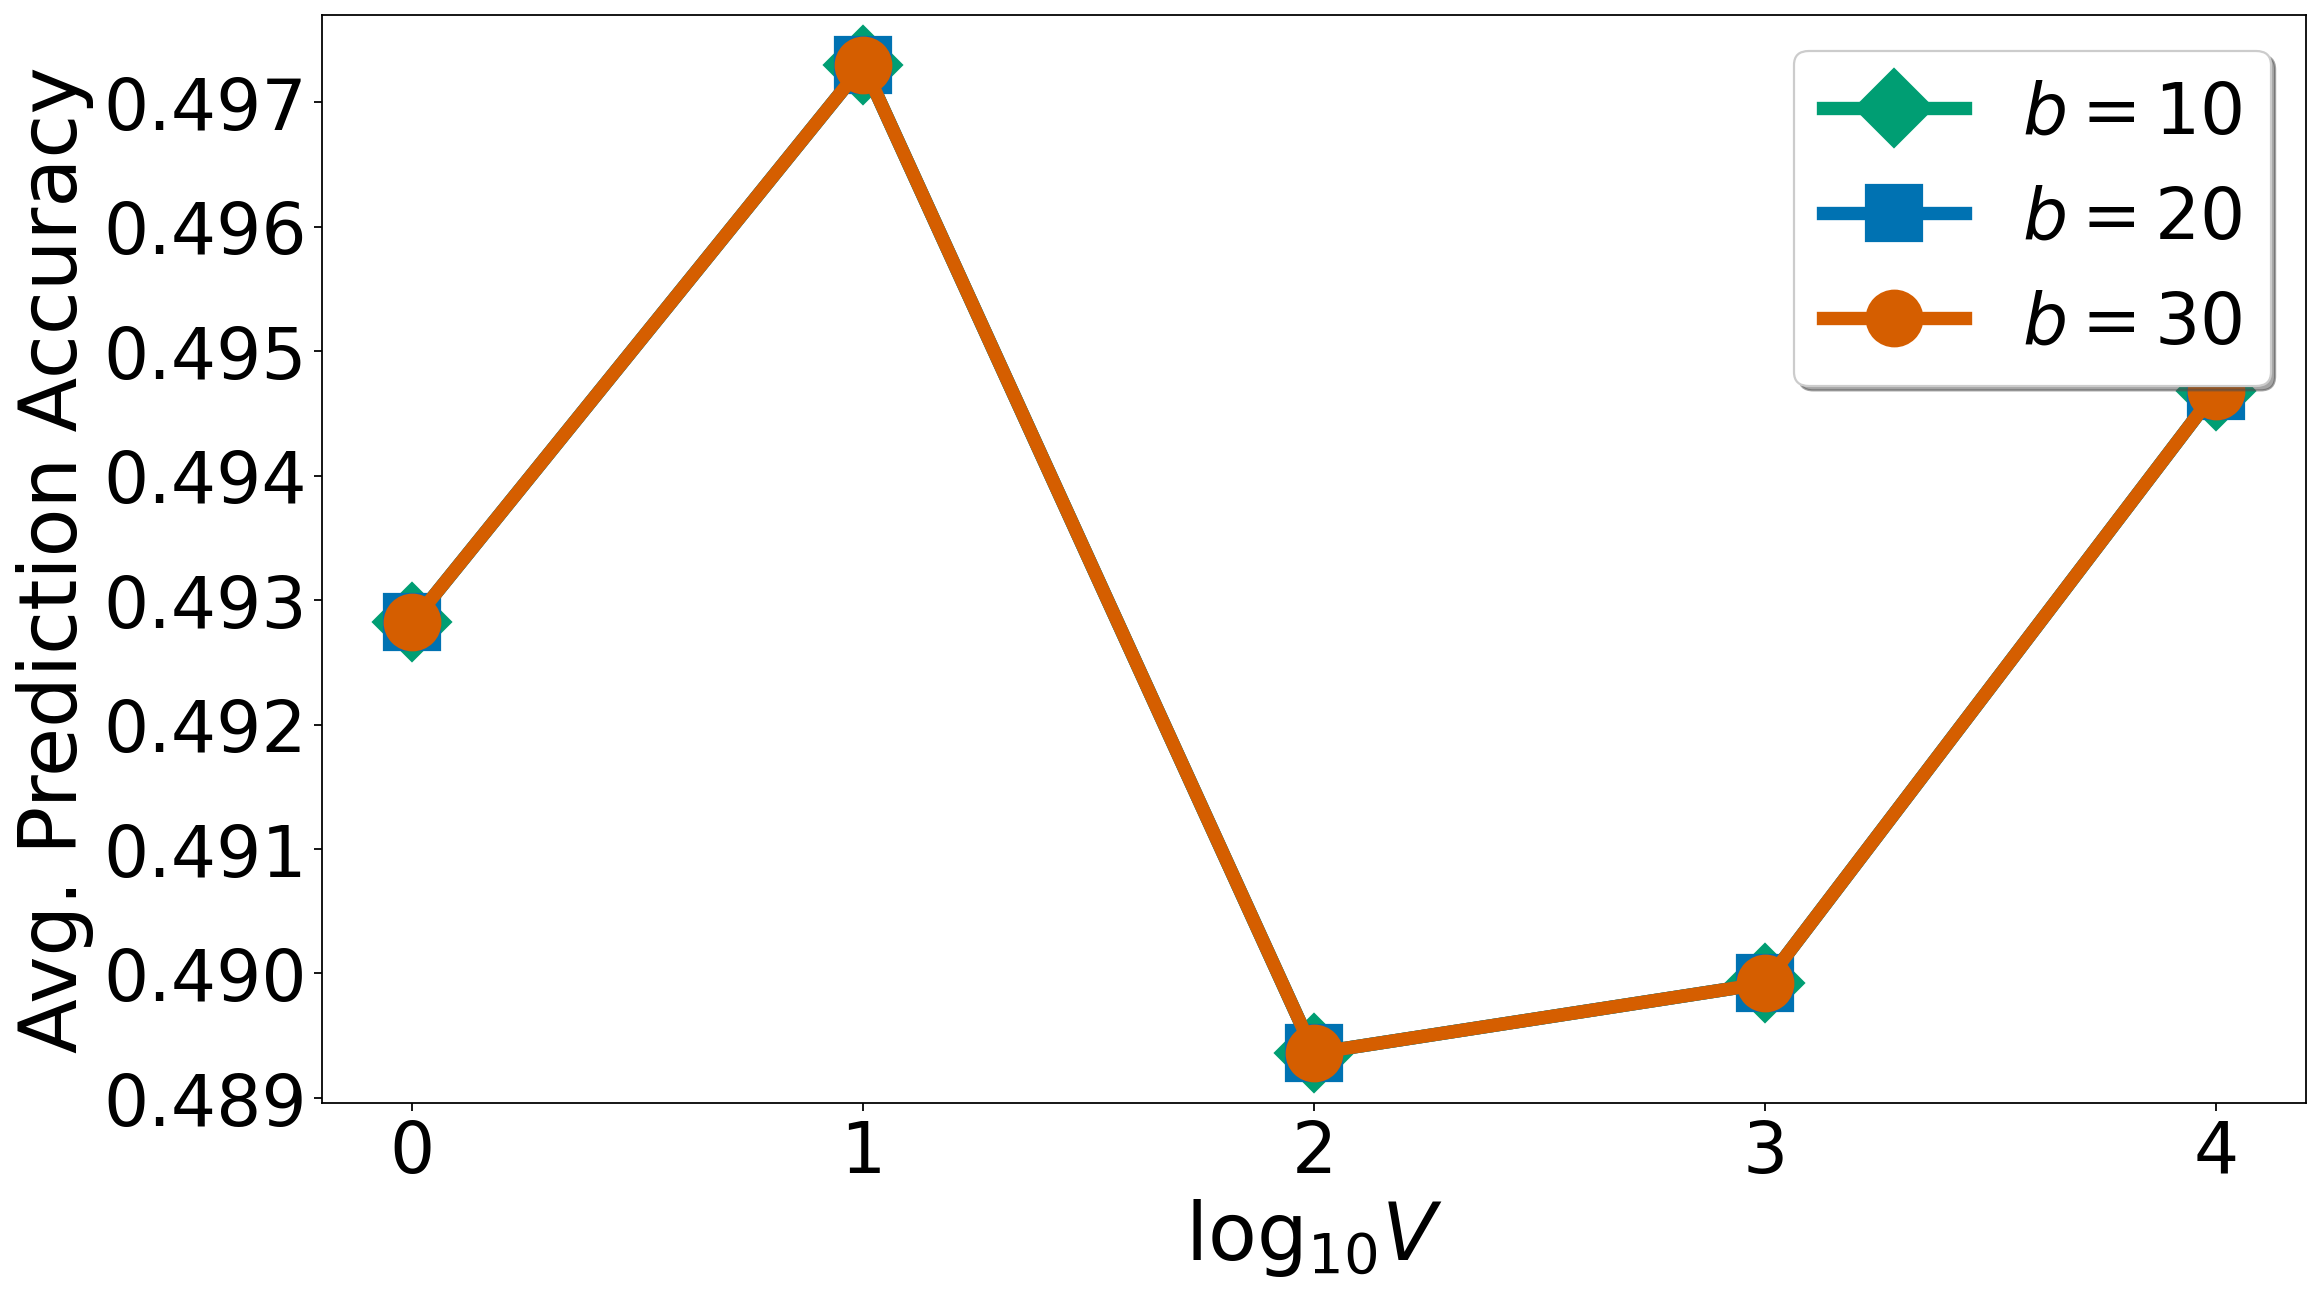

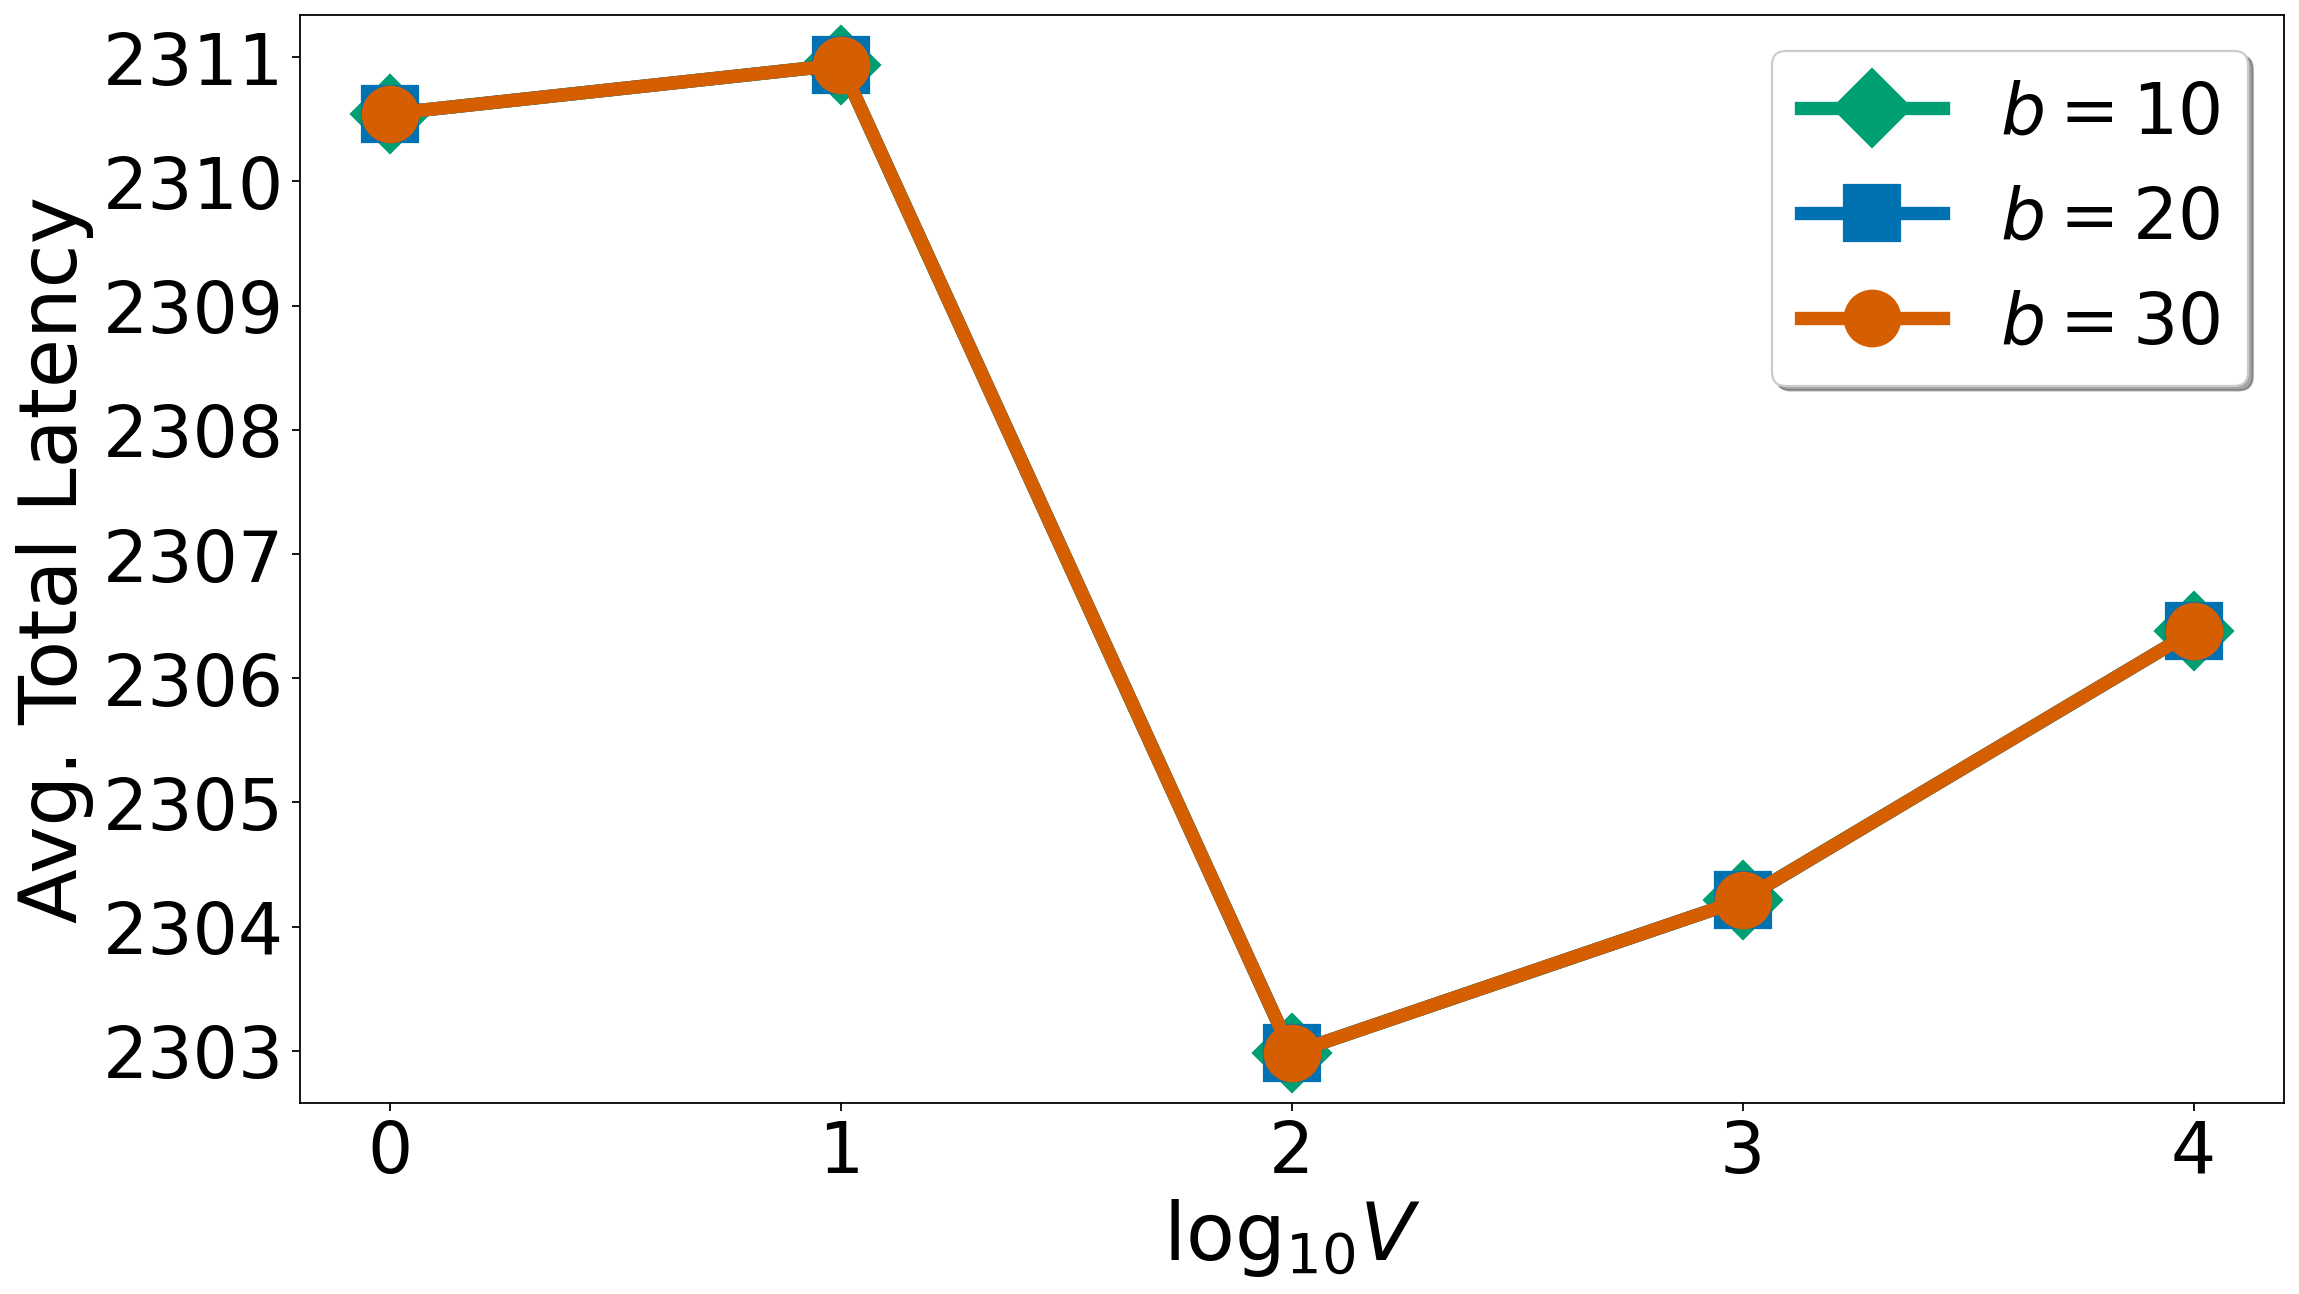

In [5]:
plot_vb_simulations()